In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

## 単回帰

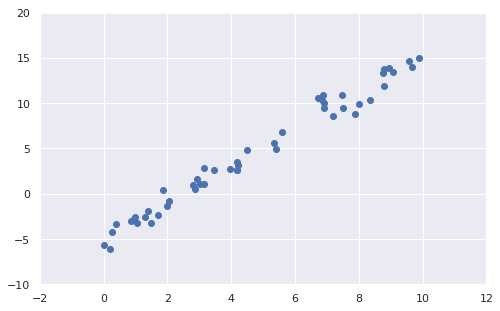

In [42]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

plt.figure(figsize=(8, 5))
plt.xlim(-2, 12)
plt.ylim(-10, 20)
plt.scatter(x, y)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

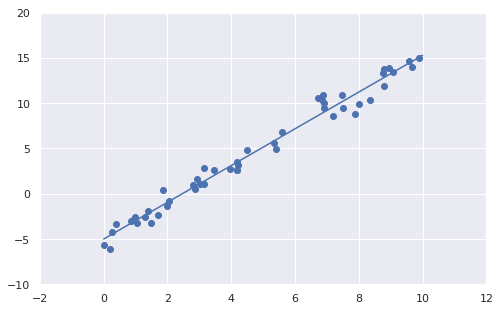

In [45]:
plt.figure(figsize=(8, 5))
plt.xlim(-2, 12)
plt.ylim(-10, 20)
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [46]:
print('Model slope: ', model.coef_)
print('Model intercept: ', model.intercept_)

Model slope:  [2.02720881]
Model intercept:  -4.998577085553204


In [47]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print('Model slope: ', model.coef_)
print('Model intercept: ', model.intercept_)

Model slope:  [ 1.5 -2.   1. ]
Model intercept:  0.50000000000001


## 基底関数回帰

## 多項式基底関数

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
X = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(X[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [50]:
from sklearn.pipeline import make_pipeline

In [51]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

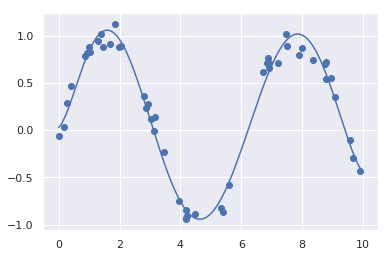

In [57]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

## ガウス基底関数

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

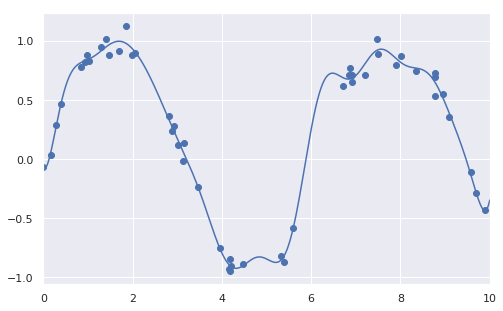

In [59]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## 正規化

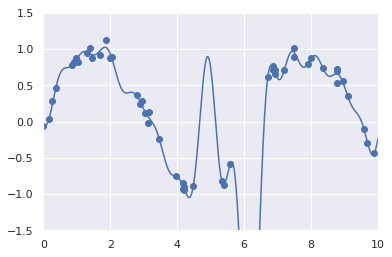

In [60]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

In [61]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

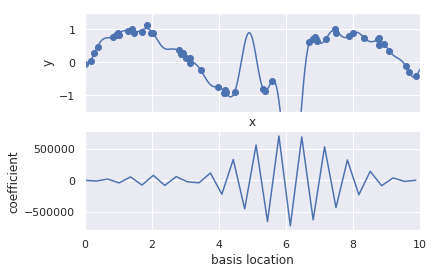

In [62]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)